In [28]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/Machine Project/Motor_Vehicle_Collisions_22-25 .csv"
df = pd.read_csv(file_path)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2022,13:07,QUEENS,11373.0,40.742737,-73.876430,"(40.742737, -73.87643)",NaN,NaN,89-22 43 AVENUE,...,Unspecified,Unspecified,NaN,NaN,4491843,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
1,01/01/2022,2:09,QUEENS,11435.0,40.714996,-73.810220,"(40.714996, -73.81022)",150 STREET,COOLIDGE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4491064,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2022,5:55,QUEENS,11435.0,40.693344,-73.802280,"(40.693344, -73.80228)",WALTHAM STREET,107 AVENUE,NaN,...,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,4491624,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Pick-up Truck
3,01/01/2022,8:00,QUEENS,11372.0,40.750810,-73.893980,"(40.75081, -73.89398)",72 STREET,35 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4491163,Taxi,Sedan,NaN,NaN,NaN
4,01/01/2022,18:25,QUEENS,11428.0,40.718513,-73.756386,"(40.718513, -73.756386)",90 AVENUE,207 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,4491415,Sedan,Sedan,Sedan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60279,05/17/2025,22:20,QUEENS,11426.0,40.726788,-73.716310,"(40.726788, -73.71631)",NaN,NaN,248-55 JERICHO TPKE,...,Unspecified,NaN,NaN,NaN,4813994,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
60280,05/17/2025,3:25,QUEENS,11354.0,NaN,NaN,NaN,150 ST,28 avenue,NaN,...,Unspecified,NaN,NaN,NaN,4813698,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
60281,05/17/2025,20:30,QUEENS,11369.0,40.764404,-73.869970,"(40.764404, -73.86997)",NaN,NaN,25-12 100 ST,...,Unspecified,NaN,NaN,NaN,4813963,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
60282,05/17/2025,0:01,QUEENS,11430.0,40.666620,-73.810460,"(40.66662, -73.81046)",BELT PKWY,130 ST,NaN,...,Unspecified,NaN,NaN,NaN,4813728,Sedan,Sedan,NaN,NaN,NaN


# Data Cleaning

In [29]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [30]:
df.isnull().sum()


,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,34
LATITUDE,1054
LONGITUDE,1054
LOCATION,1054
ON STREET NAME,21321
CROSS STREET NAME,21372
OFF STREET NAME,38963


Dropping unnecessary columns

In [32]:
df.drop(columns=['NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED',
       'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5','OFF STREET NAME','CROSS STREET NAME','ON STREET NAME'], inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60284 entries, 0 to 60283
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     60284 non-null  object 
 1   CRASH TIME                     60284 non-null  object 
 2   BOROUGH                        60284 non-null  object 
 3   ZIP CODE                       60250 non-null  float64
 4   LATITUDE                       59230 non-null  float64
 5   LONGITUDE                      59230 non-null  float64
 6   LOCATION                       59230 non-null  object 
 7   CONTRIBUTING FACTOR VEHICLE 1  59921 non-null  object 
 8   COLLISION_ID                   60284 non-null  int64  
 9   VEHICLE TYPE CODE 1            59300 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 4.6+ MB


In [34]:
df.isnull().sum()


,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,34
LATITUDE,1054
LONGITUDE,1054
LOCATION,1054
CONTRIBUTING FACTOR VEHICLE 1,363
COLLISION_ID,0
VEHICLE TYPE CODE 1,984


Handling Missing Value

In [35]:
#drop missing values from zip code
df.dropna(subset=['ZIP CODE','LATITUDE', 'LONGITUDE', 'LOCATION'], inplace=True)

In [36]:
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)

<ipython-input-36-b6d4008cdd9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)


In [37]:

most_common_vehicle = df['VEHICLE TYPE CODE 1'].mode()[0]

df['VEHICLE TYPE CODE 1'].fillna(most_common_vehicle, inplace=True)

print(f"Missing 'VEHICLE TYPE CODE 1' filled with: {most_common_vehicle}")


Missing 'VEHICLE TYPE CODE 1' filled with: Sedan


<ipython-input-37-427f4f2ddf46>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VEHICLE TYPE CODE 1'].fillna(most_common_vehicle, inplace=True)


In [38]:
df.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,0
LATITUDE,0
LONGITUDE,0
LOCATION,0
CONTRIBUTING FACTOR VEHICLE 1,0
COLLISION_ID,0
VEHICLE TYPE CODE 1,0


adding h/d/m to df

In [39]:
#one date time
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'],
                                      format='%m/%d/%Y %H:%M', errors='coerce')

df['hour'] = df['CRASH_DATETIME'].dt.hour
df['day'] = df['CRASH_DATETIME'].dt.dayofweek # 0 = Monday, 6 = Sunday
df['month'] = df['CRASH_DATETIME'].dt.month
#drop originaaall
df.drop(columns=['CRASH DATE', 'CRASH TIME'], inplace=True)

df

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CRASH_DATETIME,hour,day,month
0,QUEENS,11373.0,40.742737,-73.876430,"(40.742737, -73.87643)",Driver Inattention/Distraction,4491843,Sedan,2022-01-01 13:07:00,13,5,1
1,QUEENS,11435.0,40.714996,-73.810220,"(40.714996, -73.81022)",Following Too Closely,4491064,Sedan,2022-01-01 02:09:00,2,5,1
2,QUEENS,11435.0,40.693344,-73.802280,"(40.693344, -73.80228)",Driver Inattention/Distraction,4491624,Station Wagon/Sport Utility Vehicle,2022-01-01 05:55:00,5,5,1
3,QUEENS,11372.0,40.750810,-73.893980,"(40.75081, -73.89398)",Driver Inexperience,4491163,Taxi,2022-01-01 08:00:00,8,5,1
4,QUEENS,11428.0,40.718513,-73.756386,"(40.718513, -73.756386)",Alcohol Involvement,4491415,Sedan,2022-01-01 18:25:00,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60278,QUEENS,11419.0,40.690030,-73.812830,"(40.69003, -73.81283)",Passing or Lane Usage Improper,4813742,Station Wagon/Sport Utility Vehicle,2025-05-17 01:30:00,1,5,5
60279,QUEENS,11426.0,40.726788,-73.716310,"(40.726788, -73.71631)",Backing Unsafely,4813994,Station Wagon/Sport Utility Vehicle,2025-05-17 22:20:00,22,5,5
60281,QUEENS,11369.0,40.764404,-73.869970,"(40.764404, -73.86997)",Driver Inattention/Distraction,4813963,Station Wagon/Sport Utility Vehicle,2025-05-17 20:30:00,20,5,5
60282,QUEENS,11430.0,40.666620,-73.810460,"(40.66662, -73.81046)",Unsafe Speed,4813728,Sedan,2025-05-17 00:01:00,0,5,5


In [41]:
cleaned_path = "/content/drive/MyDrive/Machine Project/nyc_queens_collisions_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print("Cleeaned")


Cleeaned


# Visualizations

Hourly collisions

<ipython-input-42-c1c865a3b2ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='coolwarm')


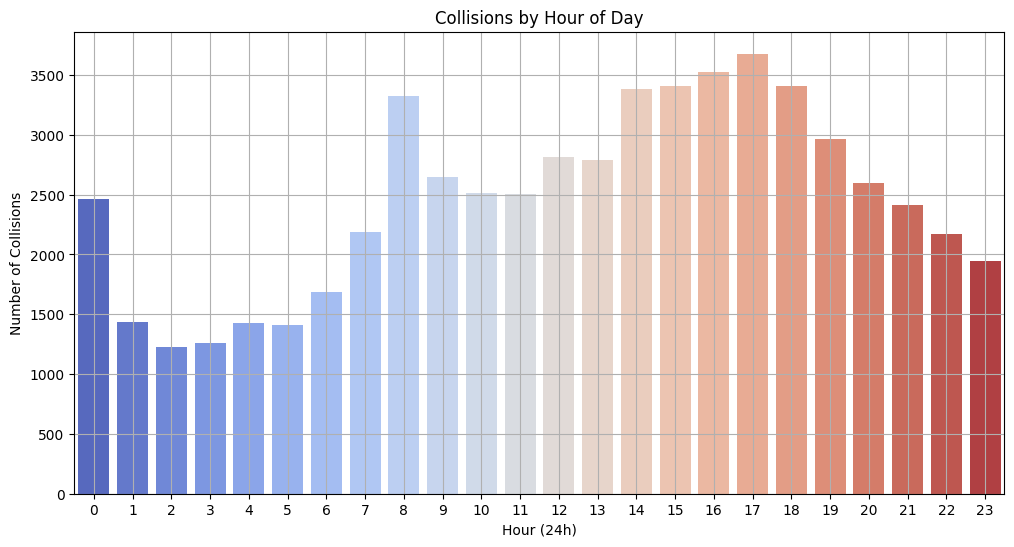

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', palette='coolwarm')
plt.title('Collisions by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()


weekly collisions

<ipython-input-43-4eb661f4621c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', order=range(7), palette='viridis')


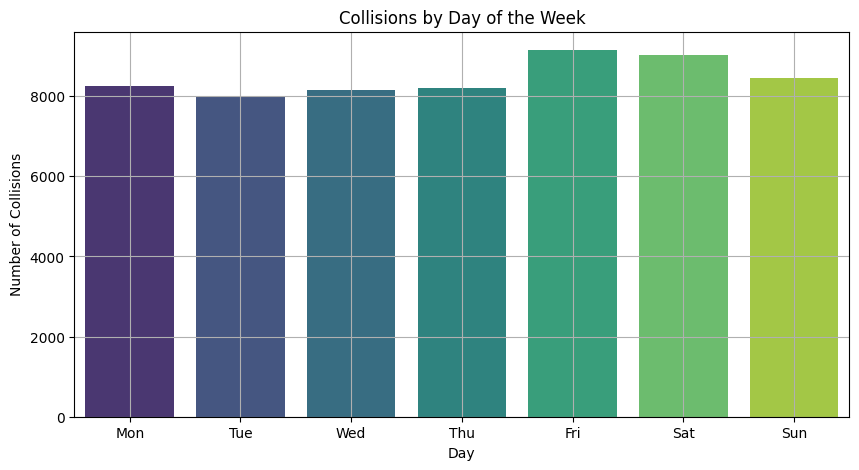

In [43]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day', order=range(7), palette='viridis')
plt.title('Collisions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(7), labels=days)
plt.grid(True)
plt.show()
#nearly the same rate of weekly collisions